<a data-flickr-embed="true" href="https://www.flickr.com/photos/spencerthomas/3358995694/" title="Camano Island Radar"><img src="https://live.staticflickr.com/3612/3358995694_37e575e038_c.jpg" width="800" height="532" alt="Camano Island Radar"/></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>
KATX Camano Island, by Spencer Thomas CC-BY-2.0

## Plotting NEXRAD Weather Stations

In [1]:
import numpy as np
import pandas as pd

import plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
%matplotlib inline

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

In [2]:
weather_station_data = pd.read_html("https://apollo.nvu.vsc.edu/classes/remote/lecture_notes/radar/88d/88D_locations.html")

In [3]:
wr = weather_station_data[0]
wr

,0,1,2,3,4,5
0,WBAN #,STATION ID,STATION NAME,"LAT N/ LONG W (deg,min,sec)",ELEV (ft),TOWER HEIGHT (m)
1,14929,KABR,"Aberdeen, SD",452721 / 0982447,1302,20
2,54766,KENX,"Albany, NY",423511 / 0740350,1826,20
3,03019,KABX,"Albuquerque, NM",350859 / 1064926,5870,20
4,03981,KFDR,"Altus AFB, OK",342144 / 0985835,1267,10
...,...,...,...,...,...,...
154,03995,KVNX,"Vance AFB, OK",364427 / 0980740,1210,10
155,93234,KVBX,"Vandenberg AFB, CA",345017 / 1202349,1223,20
156,03928,KICT,"Wichita, KS",373917 / 0972634,1335,10
157,93774,KLTX,"Wilmington, NC",335922 / 0782544,64,20


In [4]:
wr.iloc[0,:]

0                         WBAN #
1                     STATION ID
2                   STATION NAME
3    LAT N/ LONG W (deg,min,sec)
4                      ELEV (ft)
5               TOWER HEIGHT (m)
Name: 0, dtype: object

In [5]:
columns = ["WBAN", "STATION_ID", "STATION_NAME", "LAT_LONG", "ELEV_ft", "HEIGHT_m"]

In [6]:
wr.columns = columns
wr

,WBAN,STATION_ID,STATION_NAME,LAT_LONG,ELEV_ft,HEIGHT_m
0,WBAN #,STATION ID,STATION NAME,"LAT N/ LONG W (deg,min,sec)",ELEV (ft),TOWER HEIGHT (m)
1,14929,KABR,"Aberdeen, SD",452721 / 0982447,1302,20
2,54766,KENX,"Albany, NY",423511 / 0740350,1826,20
3,03019,KABX,"Albuquerque, NM",350859 / 1064926,5870,20
4,03981,KFDR,"Altus AFB, OK",342144 / 0985835,1267,10
...,...,...,...,...,...,...
154,03995,KVNX,"Vance AFB, OK",364427 / 0980740,1210,10
155,93234,KVBX,"Vandenberg AFB, CA",345017 / 1202349,1223,20
156,03928,KICT,"Wichita, KS",373917 / 0972634,1335,10
157,93774,KLTX,"Wilmington, NC",335922 / 0782544,64,20


In [7]:
wr.drop(0, inplace=True)

In [8]:
wr

,WBAN,STATION_ID,STATION_NAME,LAT_LONG,ELEV_ft,HEIGHT_m
1,14929,KABR,"Aberdeen, SD",452721 / 0982447,1302,20
2,54766,KENX,"Albany, NY",423511 / 0740350,1826,20
3,03019,KABX,"Albuquerque, NM",350859 / 1064926,5870,20
4,03981,KFDR,"Altus AFB, OK",342144 / 0985835,1267,10
5,23047,KAMA,"Amarillo, TX",351400 / 1014233,3587,20
...,...,...,...,...,...,...
154,03995,KVNX,"Vance AFB, OK",364427 / 0980740,1210,10
155,93234,KVBX,"Vandenberg AFB, CA",345017 / 1202349,1223,20
156,03928,KICT,"Wichita, KS",373917 / 0972634,1335,10
157,93774,KLTX,"Wilmington, NC",335922 / 0782544,64,20


Let's do a study with some similar data, in order to study the required lat / long formatting especially.  We see a need for decimal degrees.  Whereas our current table has string format lat / long in degrees, minutes, seconds with no separation between digits.

In [9]:
us_cities = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv")

In [10]:
us_cities

,City,State,Population,lat,lon
0,Marysville,Washington,63269,48.051764,-122.177082
1,Perris,California,72326,33.782519,-117.228648
2,Cleveland,Ohio,390113,41.499320,-81.694361
3,Worcester,Massachusetts,182544,42.262593,-71.802293
4,Columbia,South Carolina,133358,34.000710,-81.034814
...,...,...,...,...,...
995,West New York,New Jersey,52122,40.787879,-74.014306
996,Everett,Massachusetts,42935,42.408430,-71.053663
997,Linden,New Jersey,41301,40.622048,-74.244590
998,Asheville,North Carolina,87236,35.595058,-82.551487


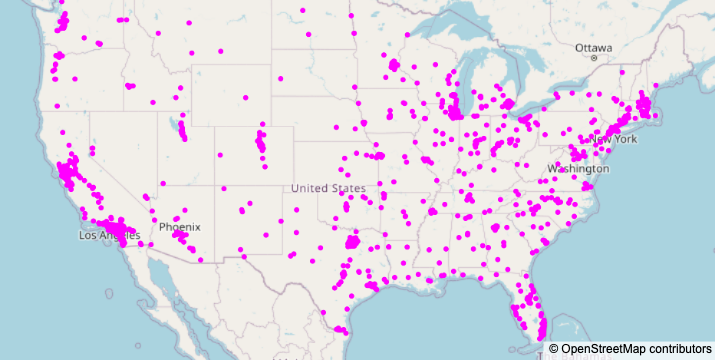

In [11]:
fig = px.scatter_mapbox(us_cities, lat="lat", lon="lon", hover_name="City", hover_data=["State", "Population"],
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [12]:
wr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 1 to 158
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   WBAN          158 non-null    object
 1   STATION_ID    158 non-null    object
 2   STATION_NAME  158 non-null    object
 3   LAT_LONG      158 non-null    object
 4   ELEV_ft       158 non-null    object
 5   HEIGHT_m      158 non-null    object
dtypes: object(6)
memory usage: 7.5+ KB


Below is the kind of data we start with in LAT_LONG and need to parse out.

In [13]:
latlong = wr.iloc[0,3]
latlong

'452721 / 0982447'

In [14]:
type(latlong)

str

In [15]:
lat, long = latlong.split(" / ")

In [16]:
lat, long

('452721', '0982447')

The following two functions with do the job with respect on longitude and latitude especially.  We may spot check our results against an authoritative website.

[DMS to Decimal Conversion](https://www.fcc.gov/media/radio/dms-decimal)

In [17]:
def mkdec_lon(lat_long):
    lon = lat_long.split(" / ")[1]
    flag = False
    if "E" in lon:
        flag = True
        lon = lon.rstrip("E")
    secs = int(lon[-2:])
    mins = int(lon[-4:-2])
    degs = int(lon[:-4])
    result = (degs + mins/60 + secs/3600)
    return -result if not flag else result

In [18]:
def mkdec_lat(lat_long):
    lat = lat_long.split(" / ")[0]
    secs = int(lat[-2:])
    mins = int(lat[-4:-2])
    degs = int(lat[:-4])
    return degs + mins/60 + secs/3600

In [19]:
mkdec_lat(latlong)

45.45583333333334

In [20]:
wr["lat"] = wr.LAT_LONG.apply(mkdec_lat)

In [21]:
wr["lon"] = wr.LAT_LONG.apply(mkdec_lon)

In [22]:
wr

,WBAN,STATION_ID,STATION_NAME,LAT_LONG,ELEV_ft,HEIGHT_m,lat,lon
1,14929,KABR,"Aberdeen, SD",452721 / 0982447,1302,20,45.455833,-98.413056
2,54766,KENX,"Albany, NY",423511 / 0740350,1826,20,42.586389,-74.063889
3,03019,KABX,"Albuquerque, NM",350859 / 1064926,5870,20,35.149722,-106.823889
4,03981,KFDR,"Altus AFB, OK",342144 / 0985835,1267,10,34.362222,-98.976389
5,23047,KAMA,"Amarillo, TX",351400 / 1014233,3587,20,35.233333,-101.709167
...,...,...,...,...,...,...,...,...
154,03995,KVNX,"Vance AFB, OK",364427 / 0980740,1210,10,36.740833,-98.127778
155,93234,KVBX,"Vandenberg AFB, CA",345017 / 1202349,1223,20,34.838056,-120.396944
156,03928,KICT,"Wichita, KS",373917 / 0972634,1335,10,37.654722,-97.442778
157,93774,KLTX,"Wilmington, NC",335922 / 0782544,64,20,33.989444,-78.428889


In [23]:
wr.query("STATION_ID == 'KATX'")

,WBAN,STATION_ID,STATION_NAME,LAT_LONG,ELEV_ft,HEIGHT_m,lat,lon
139,94287,KATX,"Seattle/Tacoma, WA",481140 / 1222945,494,30,48.194444,-122.495833


In [24]:
wr[wr.STATION_NAME.str.contains("Korea")]

,WBAN,STATION_ID,STATION_NAME,LAT_LONG,ELEV_ft,HEIGHT_m,lat,lon
21,43216,RKSG,"Camp Humphreys, Korea",365721 / 1270116E,52,20,36.955833,127.021111
80,PENDING,RKJK,"Kunsan AB, Korea",355527 / 1263720E,78,30,35.924167,126.622222


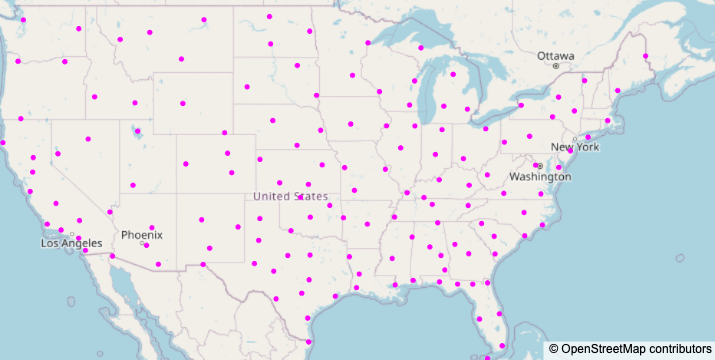

In [25]:
fig = px.scatter_mapbox(wr, lat="lat", lon="lon", 
                        hover_name="STATION_NAME", 
                        hover_data=["STATION_ID", "STATION_NAME"],
                        color_discrete_sequence=["fuchsia"], 
                        zoom=3, 
                        height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()